<a href="https://colab.research.google.com/github/MuhammadMazid/MuhammadMazid/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import os

from imutils import paths
from PIL import Image

from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [ ]:
import os

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping 

In [ ]:
# dataset information
with_mask_dir=r'/content/drive/MyDrive/face_mask/with_mask'
without_mask_dir=r'/content/drive/MyDrive/face_mask/without_mask'
filepaths = []
labels= []
dict_list = [with_mask_dir, without_mask_dir]
for i, j in enumerate(dict_list):
    flist=os.listdir(j)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        #print(fpath)
        if i==0:
          labels.append(1)
        else:
          labels.append(0) 
    
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
mask_data = pd.concat([Fseries,Lseries], axis=1)
mask_df = pd.DataFrame(mask_data)
print(mask_df.head())
print(mask_df["labels"].value_counts())

                                           filepaths  labels
0  /content/drive/MyDrive/face_mask/with_mask/wit...       1
1  /content/drive/MyDrive/face_mask/with_mask/wit...       1
2  /content/drive/MyDrive/face_mask/with_mask/wit...       1
3  /content/drive/MyDrive/face_mask/with_mask/wit...       1
4  /content/drive/MyDrive/face_mask/with_mask/wit...       1
0    3828
1    3725
Name: labels, dtype: int64


In [ ]:
mask_data.shape

(7553, 2)

In [ ]:
mask_slice = pd.concat([mask_data.head(500), mask_data.tail(500)])
#mask_slice.shape
#mask_slice.tail


In [ ]:
from skimage import data, color, feature
from skimage.transform import resize

import skimage.data

from PIL import Image
import requests
from io import BytesIO
from skimage import io

mask_slice['image'] = [io.imread(image) for image in mask_slice['filepaths']]
mask_slice['image'] = [skimage.color.rgb2gray(image) for image in mask_slice['image']]
mask_slice['image'] = [resize(image, (100, 100), preserve_range=True) for image in mask_slice['image']]
#mask_slice['image'] = [skimage.transform.rescale(image, 0.5) for image in mask_slice['image']]
#mask_slice['image'] = [image[80:160,:] for image in mask_slice['image']]




In [ ]:
mask_slice = mask_slice.drop(26)


In [ ]:
mask_slice.reset_index(drop=True)


,filepaths,labels,image
0,/content/drive/MyDrive/face_mask/with_mask/wit...,1,"[[0.17519871166925868, 0.0977532331037457, 0.0..."
1,/content/drive/MyDrive/face_mask/with_mask/wit...,1,"[[0.3173660665035658, 0.3741767045227047, 0.44..."
2,/content/drive/MyDrive/face_mask/with_mask/wit...,1,"[[0.7342272582194986, 0.7336936664401927, 0.73..."
3,/content/drive/MyDrive/face_mask/with_mask/wit...,1,"[[0.0, 0.0, 0.0, 1.0333422331329432e-07, 4.595..."
4,/content/drive/MyDrive/face_mask/with_mask/wit...,1,"[[0.2945610991879236, 0.2959203185215604, 0.29..."
...,...,...,...
995,/content/drive/MyDrive/face_mask/without_mask/...,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
996,/content/drive/MyDrive/face_mask/without_mask/...,0,"[[0.6786545098039216, 0.6786545098039216, 0.67..."
997,/content/drive/MyDrive/face_mask/without_mask/...,0,"[[0.872506135375007, 0.8756661473043776, 0.877..."
998,/content/drive/MyDrive/face_mask/without_mask/...,0,"[[0.16081905603677624, 0.14306633065834584, 0...."


In [ ]:
mask_slice['image'] = [image[50:100,:] for image in mask_slice['image']]


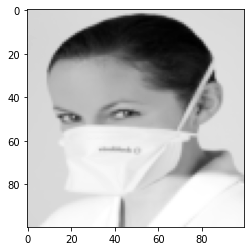

In [ ]:

img=mask_slice['image'].iloc[26]
plt.imshow(img, cmap='gray')


In [ ]:
from skimage import data, color, feature
import skimage.data

X_train = [feature.hog(im) for im in mask_slice['image']]
X_train = np.array(X_train)
y_train = mask_slice['labels']

X_train.shape

(999, 8100)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(), X_train, y_train)

array([0.585, 0.73 , 0.785, 0.665, 0.78 ])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

knn_gscv.fit(X_train, y_train)
knn_gscv.best_score_

0.819

In [ ]:
knn_gscv.best_params_


{'n_neighbors': 7}

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 15)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [ 1.0, 2.0, 3.0, 4.0]})
grid.fit(X_train, y_train)
grid.best_score_

0.77

In [ ]:
grid.best_params_


{'C': 1.0}

In [ ]:
grid = LinearSVC(C= 1.0)
grid.fit(X_train, y_train)

LinearSVC()

(80, 160)

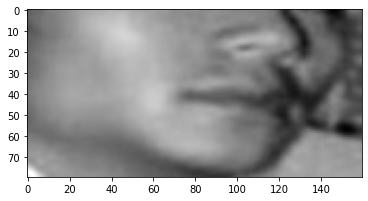

In [ ]:
url = '/content/drive/MyDrive/face_mask/without_mask/without_mask_21.jpg'
test_image = io.imread(url)

test_image = skimage.color.rgb2gray(test_image)
test_image = resize(test_image, (400, 400), preserve_range=True)
test_image = skimage.transform.rescale(test_image, 0.4)
test_image = test_image[80:160,:]

plt.imshow(test_image, cmap='gray')

test_image.shape

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 7)
knn2.fit(X_train, y_train)

X_test = np.array([feature.hog(test_image)])
y_pred = knn2.predict(X_test)
y_pred
#X_test.shape

array([0])

No Mask


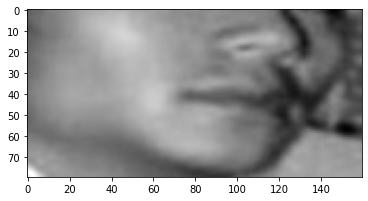

In [ ]:
url = '/content/drive/MyDrive/face_mask/without_mask/without_mask_21.jpg'
test_image = io.imread(url)

test_image = skimage.color.rgb2gray(test_image)
test_image = resize(test_image, (400, 400), preserve_range=True)
test_image = skimage.transform.rescale(test_image, 0.4)
test_image = test_image[80:160,:]

plt.imshow(test_image, cmap='gray')

y_pred = knn2.predict(X_test)
print("No Mask" if y_pred[0] ==0 else "Mask")

No Mask


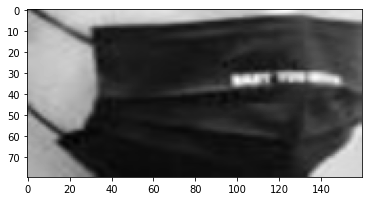

In [ ]:
url = '/content/drive/MyDrive/face_mask/with_mask/with_mask_435.jpg'
test_image = io.imread(url)

test_image = skimage.color.rgb2gray(test_image)
test_image = resize(test_image, (400, 400), preserve_range=True)
test_image = skimage.transform.rescale(test_image, 0.4)
test_image = test_image[80:160,:]

plt.imshow(test_image, cmap='gray')

y_pred = grid.predict(X_test)
print("No Mask" if y_pred[0] ==0 else "Mask")

In [ ]:
flatten = [item.flatten() for item in mask_slice['image']]

np.array(flatten).shape

(1000, 10000)

In [ ]:
#X_train = [feature.hog(im) for im in mask_slice['image']]
X_train2 = np.array(flatten)
y_train2 = mask_slice['labels']

X_train2.shape

(1000, 10000)

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [ ]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [5, 10],
'svc__gamma': [ 0.001, 0.01]}
grid = GridSearchCV(model, param_grid)

In [ ]:
grid.fit(X_train2, y_train2)
print(grid.best_params_)
#print(grid.best_score__)


{'svc__C': 5, 'svc__gamma': 0.001}


In [ ]:
model = grid.best_estimator_

ValueError: ignored

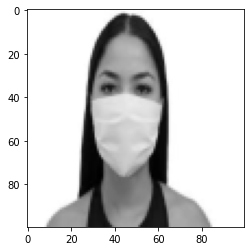

In [ ]:
url = '/content/drive/MyDrive/face_mask/with_mask/with_mask_3725.jpg'
test_image = io.imread(url)

test_image = skimage.color.rgb2gray(test_image)
test_image = resize(test_image, (200, 200), preserve_range=True)
test_image = skimage.transform.rescale(test_image, 0.5)
#test_image = test_image[80:160,:]
flatten = pd.DataFrame(test_image.flatten())

plt.imshow(test_image, cmap='gray')


y_pred = model.predict(flatten.T)
print("No Mask" if y_pred[0] ==0 else "Mask")

No Mask


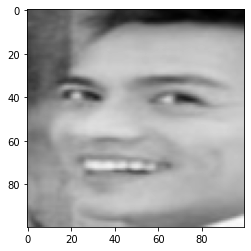

In [ ]:
url2 = '/content/drive/MyDrive/face_mask/without_mask/without_mask_321.jpg'
test_image2 = io.imread(url2)

test_image2 = skimage.color.rgb2gray(test_image2)
test_image2 = resize(test_image2, (200, 200), preserve_range=True)
test_image2 = skimage.transform.rescale(test_image2, 0.5)
#test_image = test_image[80:160,:]
flatten2 = pd.DataFrame(test_image2.flatten())

plt.imshow(test_image2, cmap='gray')


y_pred = model.predict(flatten2.T)
print("No Mask" if y_pred[0] ==0 else "Mask")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

knn_gscv.fit(X_train2, y_train2)
knn_gscv.best_score_

0.7270000000000001

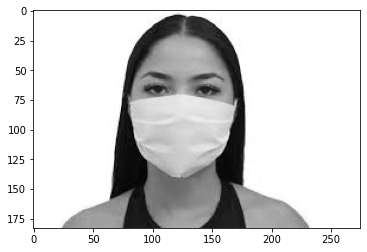

In [ ]:


url3 = "https://www.incimages.com/uploaded_files/image/1920x1080/getty_481292845_77896.jpg"

url2 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTG4MMtSMn-Un6ZvGM7N3eU-fsBxgAtkcs9CQ&usqp=CAU"

url = "https://media.istockphoto.com/photos/child-faces-picture-id117058793"

url = '/content/drive/MyDrive/face_mask/with_mask/with_mask_3725.jpg'
#response = requests.get(url)
#test_image = Image.open(BytesIO(response.content))
#test_image = Image.open(BytesIO(response.content)).numpy.asarray(image)
test_image = io.imread(url)
test_image = skimage.color.rgb2gray(test_image)

test_image = skimage.transform.rescale(test_image, 1)

plt.imshow(test_image, cmap='gray')
#plt.axis('off');

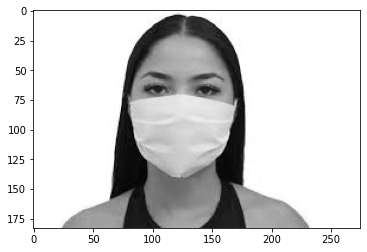

In [ ]:
from skimage import data, color, feature
import skimage.data

from PIL import Image
import requests
from io import BytesIO
from skimage import io

url3 = "https://www.incimages.com/uploaded_files/image/1920x1080/getty_481292845_77896.jpg"

url2 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTG4MMtSMn-Un6ZvGM7N3eU-fsBxgAtkcs9CQ&usqp=CAU"

url = "https://media.istockphoto.com/photos/child-faces-picture-id117058793"

url = '/content/drive/MyDrive/face_mask/with_mask/with_mask_3725.jpg'
#response = requests.get(url)
#test_image = Image.open(BytesIO(response.content))
#test_image = Image.open(BytesIO(response.content)).numpy.asarray(image)
test_image = io.imread(url)
test_image = skimage.color.rgb2gray(test_image)

test_image = skimage.transform.rescale(test_image, 1)

plt.imshow(test_image, cmap='gray')
#plt.axis('off');

In [ ]:
mask_df.shape


(7553, 2)

In [ ]:
mask_df.head()

,filepaths,labels
0,/content/drive/MyDrive/face_mask/with_mask/wit...,with_mask
1,/content/drive/MyDrive/face_mask/with_mask/wit...,with_mask
2,/content/drive/MyDrive/face_mask/with_mask/wit...,with_mask
3,/content/drive/MyDrive/face_mask/with_mask/wit...,with_mask
4,/content/drive/MyDrive/face_mask/with_mask/wit...,with_mask


In [ ]:
train_set, test_images = train_test_split(mask_df, test_size=0.3, random_state=42)
test_set, val_set = train_test_split(test_images, test_size=0.2, random_state=42)

In [ ]:
#Generate batches of tensor image data with real-time data augmentation.
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)

train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='grayscale',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )

test = image_gen.flow_from_dataframe(dataframe= test_set,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='grayscale',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )

val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'grayscale',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 5287 validated image filenames belonging to 2 classes.
Found 1812 validated image filenames belonging to 2 classes.
Found 454 validated image filenames belonging to 2 classes.


In [ ]:
#print the classes of dataset - we used two class - they are with mask and without mask
classes=list(train.class_indices.keys())
print (classes)

['with_mask', 'without_mask']


In [ ]:
# showing images function
def show_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator 
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

TypeError: ignored

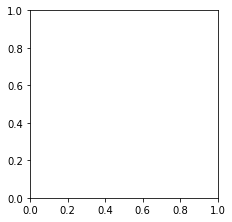

In [ ]:
show_images(train)


In [ ]:
train

In [ ]:
#performance function
def plot_loss_and_accuracy(history):
    history_df = pd.DataFrame(history)
    history_df.loc[0:, ['loss', 'val_loss']].plot()
    history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

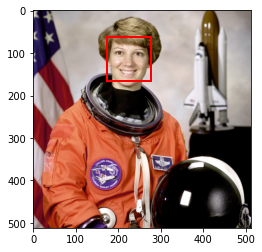

In [ ]:
from skimage import data
from skimage.feature import Cascade

import matplotlib.pyplot as plt
from matplotlib import patches

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

img = data.astronaut()

detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(80, 80),
                                       max_size=(120, 120))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()

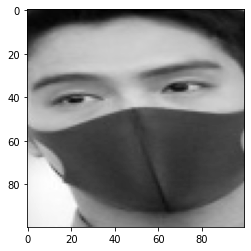

In [ ]:
url = '/content/drive/MyDrive/face_mask/without_mask/without_mask_422.jpg'
url = '/content/drive/MyDrive/face_mask/with_mask/with_mask_172.jpg'

test_image = io.imread(url)

test_image = skimage.color.rgb2gray(test_image)
test_image = resize(test_image, (100, 100), preserve_range=True)
#test_image = skimage.transform.rescale(test_image, 0.4)

plt.imshow(test_image, cmap='gray')


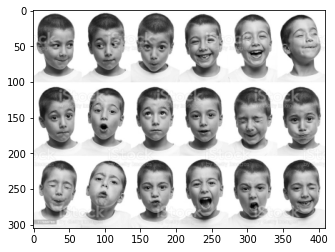

In [ ]:
from PIL import Image
import requests
from io import BytesIO
from skimage import io

url3 = "https://www.incimages.com/uploaded_files/image/1920x1080/getty_481292845_77896.jpg"

url2 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTG4MMtSMn-Un6ZvGM7N3eU-fsBxgAtkcs9CQ&usqp=CAU"

url = "https://media.istockphoto.com/photos/child-faces-picture-id117058793"
#response = requests.get(url)
#test_image = Image.open(BytesIO(response.content))
#test_image = Image.open(BytesIO(response.content)).numpy.asarray(image)
test_image = io.imread(url)
test_image = skimage.color.rgb2gray(test_image)

test_image = skimage.transform.rescale(test_image, 0.4)

plt.imshow(test_image, cmap='gray')
#plt.axis('off');

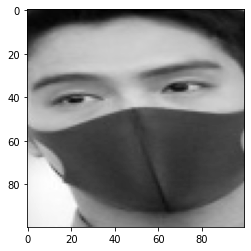

In [ ]:


img = test_image


detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.1,
                                       step_ratio=0.6,
                                       min_size=(40, 40),
                                       max_size=(400, 400))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()

In [ ]:
from skimage import data, color, feature
import skimage.data

X_train = [feature.hog(im) for im in mask_slice['image']]
#X_train = [im.flatten() for im in mask_slice['image']]

X_train = np.array(X_train)
y_train = mask_slice['labels']

X_train.shape

(1000, 8100)

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [ ]:
pca = RandomizedPCA(n_components=300)
pca.fit(X_train)                 
X_transformed = pca.transform(X_train)



In [ ]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=300)
X_transformed = iso.fit_transform(X_train)
X_transformed.shape

(1000, 300)

In [ ]:
print(X_transformed)

[[ 1.0564307   0.32122324  0.52291667 ... -0.15185185 -0.14346264
  -0.31849564]
 [ 3.18974225 -0.92674668 -0.85558996 ... -0.01295466 -0.17107182
   0.12955252]
 [-1.07751816  0.73633178 -1.18888539 ...  0.11010183  0.06325666
  -0.2500147 ]
 ...
 [ 4.14497764 -0.52445106  0.3392943  ... -0.11690009  0.27367668
   0.2089243 ]
 [-1.0974948   2.47080944  1.73374884 ...  0.10962979 -0.42699278
  -0.13604796]
 [ 0.51570568  1.93583612  1.52811763 ...  0.1687482   0.25264753
  -0.178388  ]]


In [ ]:
X_transformed_plot = pd.DataFrame(X_transformed)
X_transformed_plot['label'] = mask_slice['labels']

X_transformed_plot['label'] = X_transformed_plot['label'].fillna(0).astype('int32')

X_transformed_plot.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,label
995,3.417512,0.708683,-1.960940,3.249970,1.183089,0.430653,-0.482080,0.410919,-0.023064,1.205722,0.746650,0.774714,-0.488304,0.099337,1.089600,-0.641274,-0.617842,0.846741,0.128997,0.487353,0.289532,-1.064252,-0.025203,-0.513639,-0.404230,0.182820,-0.933996,-0.341868,0.658940,0.138067,-0.879744,-0.704215,0.105589,-0.293658,-0.246488,0.169853,-0.581756,-0.499006,-0.470719,-0.697088,...,-0.222182,-0.580756,-0.029276,0.211517,-0.051572,0.045219,0.129779,-0.088919,0.115173,0.391344,0.061159,0.123902,0.228191,0.159443,-0.087110,-0.298066,-0.054287,0.037272,-0.320171,0.045728,-0.032946,0.210857,-0.305763,-0.220831,-0.314655,0.270096,0.162791,-0.134680,0.263572,-0.017818,0.045775,0.074913,-0.317194,0.061023,0.165686,-0.238408,0.188478,0.018923,0.048605,0
996,1.081631,2.435260,1.040513,0.824250,-0.692865,0.517533,-0.103878,-0.420619,-0.392086,0.598753,1.644266,-0.364381,-0.428088,-0.474667,-0.000263,-0.081112,-0.058465,-0.366771,-0.484158,0.596358,0.382406,-0.154474,0.165760,-0.586543,0.623918,0.363465,0.866281,-0.754292,-0.667687,-0.185339,-0.068688,0.132555,0.443309,0.483537,-0.790663,0.224523,-0.359876,-0.534991,-0.077531,-0.065343,...,0.154339,-0.138962,-0.041333,-0.055449,-0.007761,0.243187,-0.120834,-0.537106,-0.560783,-0.238105,0.027195,0.027818,-0.005777,0.012331,0.036309,-0.033440,-0.190471,0.313552,-0.027634,-0.010044,0.328922,0.248471,0.170467,-0.243214,0.341141,-0.081211,-0.099035,-0.401262,-0.292026,0.060455,0.266424,0.202511,0.126750,-0.049041,0.354422,-0.408925,-0.092754,0.207435,0.113804,0
997,4.144978,-0.524451,0.339294,0.682438,1.161558,0.737129,-0.837091,0.967196,1.221589,0.824134,0.669910,1.047553,1.033235,0.326312,0.836227,-0.466306,0.305070,0.455204,-0.232268,0.748836,-1.209402,-0.121678,0.331293,0.385199,0.426207,-0.523352,-0.672694,0.183828,0.349786,0.400725,-0.592318,-0.194815,-0.445833,0.266467,0.297751,-0.697575,0.299031,0.206894,-0.185997,-0.238551,...,0.525717,0.044383,0.072593,-0.186200,0.175410,-0.046846,-0.056343,-0.212609,-0.278930,-0.238601,0.075028,-0.218398,-0.227476,0.195059,0.059323,0.179097,-0.273375,-0.430588,-0.342865,-0.209113,0.115400,-0.019720,-0.065517,-0.024296,0.054656,-0.132511,0.320204,-0.157868,0.009500,0.405984,0.078922,-0.086668,0.302711,0.140585,-0.134687,0.123984,-0.116900,0.273677,0.208924,0
998,-1.097495,2.470809,1.733749,0.657560,-1.027782,0.581599,0.162694,-0.969942,-0.373225,-0.178374,-0.440619,-0.229188,0.212196,-0.099671,1.710976,0.133234,-0.273753,0.527180,0.289484,-0.034455,0.012413,-0.098150,0.307489,-1.335082,-0.959396,-0.200471,0.642148,-0.800600,-0.603510,0.418963,-0.288620,-0.028716,0.110799,-0.116772,-0.162994,0.625957,0.231182,-0.100760,0.070373,-0.050569,...,-0.248285,0.132649,-0.213895,0.003667,-0.182455,0.245100,0.016156,0.178343,0.094341,-0.082165,0.238378,-0.382690,-0.039778,-0.076038,-0.286970,0.167171,-0.006378,-0.061614,0.071282,-0.044448,-0.069631,-0.406958,0.198679,0.451391,0.173429,0.163719,-0.091565,-0.050857,-0.265121,-0.161443,-0.344041,0.072403,0.087772,0.042389,0.269305,-0.075765,0.109630,-0.426993,-0.136048,0
999,0.515706,1.935836,1.528118,-1.009902,-0.424323,0.495428,-0.116704,0.105936,0.118691,-1.416447,0.187693,0.766284,-0.476510,0.597376,0.190612,0.141867,-0.108846,-0.426000,-0.139869,0.230870,-1.333580,0.072554,0.758630,-0.272027,-0.106104,-0.144169,-0.355783,0.181620,-0.148112,0.529145,0.105041,0.172735,-0.759562,-0.076459,-0.143273,1.027769,1.169281,-0.412966,0.396363,-0.266890,...,0.210121,0.381455,-0.086253,-0.066038,-0.074365,0.126108,0.460582,-0.008092,0.246376,-0.264110,0.496470,-0.081356,0.130803,-0.095234,-0.205993,-0.085033,-0.022607,0.046421,0.067933,-0.088219,0.014510,0.269075,-0.138736,-0.110725,-0.129933,-0.165689,0.118392,0.191922,0.198215,0.010678,-0.037215

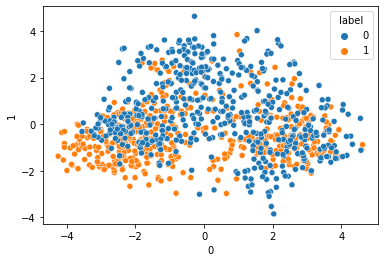

In [ ]:
sns.scatterplot(data = X_transformed_plot
                ,x = X_transformed_plot[0]
                ,y = X_transformed_plot[1]
                ,hue = 'label'
                )

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [ ]:
model = SVC(kernel='rbf', class_weight='balanced')


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [5, 10],
'gamma': [ 0.001, 0.01]}
grid = GridSearchCV(model, param_grid)

In [ ]:
grid.fit(X_transformed, y_train)
print(grid.best_params_)
#print(grid.best_score__)


{'C': 10, 'gamma': 0.01}


In [ ]:
print(grid.best_score_)

0.813


In [ ]:
model = grid.best_estimator_

In [ ]:
# Bagged Decision Trees for Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

X = X_transformed
Y = y_train
seed = 7
kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model2 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model2, X, Y, cv=kfold)
print(results.mean())

0.643


Mask


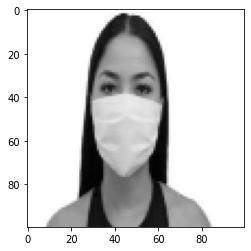

In [ ]:
url = '/content/drive/MyDrive/face_mask/with_mask/with_mask_3725.jpg'
test_image = io.imread(url)

test_image = skimage.color.rgb2gray(test_image)
test_image = resize(test_image, (100, 100), preserve_range=True)
#test_image = skimage.transform.rescale(test_image, 0.5)
#test_image = test_image[80:160,:]
flatten = pd.DataFrame(feature.hog(test_image))
transformed = pca.transform(flatten.T)


plt.imshow(test_image, cmap='gray')


y_pred = model.predict(transformed)
print("No Mask" if y_pred[0] ==0 else "Mask")

No Mask


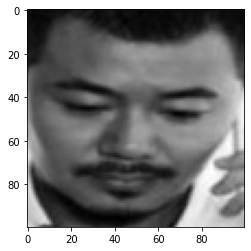

In [ ]:
url = '/content/drive/MyDrive/face_mask/without_mask/without_mask_111.jpg'
test_image = io.imread(url)

test_image = skimage.color.rgb2gray(test_image)
test_image = resize(test_image, (100, 100), preserve_range=True)
#test_image = skimage.transform.rescale(test_image, 0.5)
#test_image = test_image[80:160,:]
flatten = pd.DataFrame(feature.hog(test_image))
transformed = pca.transform(flatten.T)


plt.imshow(test_image, cmap='gray')


y_pred = model.predict(transformed)
print("No Mask" if y_pred[0] ==0 else "Mask")

In [ ]:
mask_data.shape

(7553, 2)

In [ ]:
mask_data['image'] = [io.imread(image) for image in mask_data['filepaths']]
mask_data['image'] = [skimage.color.rgb2gray(image) for image in mask_data['image']]
mask_data['image'] = [resize(image, (100, 100), preserve_range=True) for image in mask_data['image']]


In [ ]:
X = [feature.hog(im) for im in mask_data['image']]


In [ ]:
X = np.array(X)

In [ ]:
pca = RandomizedPCA(n_components=300)
pca.fit(X)                 
X_transformed = pca.transform(X)

In [ ]:
y_transformed = mask_data['labels']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5060, 300) (2493, 300) (5060,) (2493,)


In [ ]:
from sklearn.svm import SVC
model_SVC = SVC(kernel='rbf', class_weight='balanced')



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [5, 10],'gamma': [ 0.001, 0.01]}
grid = GridSearchCV(model_SVC, param_grid)

In [ ]:
grid.fit(X_train, y_train)
print(grid.best_params_)


{'C': 10, 'gamma': 0.01}


In [ ]:
print(grid.best_score_)

0.8826086956521738


In [ ]:
model_SVC = grid.best_estimator_

Y_preds = model_SVC.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, Y_preds)


0.8752507019655034

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_preds)


array([[1091,  160],
       [ 151, 1091]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]} # l1 lasso l2 ridge
model_lr = GridSearchCV(lr, param_grid=grid_values, cv=5)

In [ ]:
model_lr.fit(X_train, y_train)
print(model_lr.best_params_)


{'C': 0.1, 'penalty': 'l2'}


In [ ]:
print(model_lr.best_score_)

0.8124505928853754


In [ ]:
model_LR = model_lr.best_estimator_

Y_preds = model_LR.predict(X_test)

In [ ]:
accuracy_score(y_test, Y_preds)

0.7974328118732451

In [ ]:
confusion_matrix(y_test, Y_preds)

array([[ 985,  266],
       [ 239, 1003]])

In [ ]:
# Bagged Decision Trees for Classification
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

X = X_transformed
Y = y_transformed

kfold = model_selection.KFold(n_splits=5)
cart = DecisionTreeClassifier()
num_trees = 10
model_DT = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model_DT, X, Y, cv=kfold)
print(results.mean())

0.6479606944219214


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = X_transformed
Y = y_transformed
num_trees = 10
max_features = 3
kfold = model_selection.KFold(n_splits=5)
model_RF = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model_RF, X, Y, cv=kfold)
print(results.mean())

0.4348104189585424


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

X = X_transformed
Y = y_transformed

num_trees = 10
max_features = 7
kfold = model_selection.KFold(n_splits=5)
model_ET = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model_ET, X, Y, cv=kfold)
print(results.mean())

0.4673897817769032


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

X = X_transformed
Y = y_transformed

num_trees = 3
kfold = model_selection.KFold(n_splits=5)
model_AB = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model_AB, X, Y, cv=kfold)
print(results.mean())

0.42271229526518556


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X = X_transformed
Y = y_transformed

num_trees = 10
kfold = model_selection.KFold(n_splits=5)
model_GB = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model_GB, X, Y, cv=kfold)
print(results.mean())

0.3979746757771924


In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

X = X_train
Y = y_train

kfold = model_selection.KFold(n_splits=5)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = BaggingClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.8494071146245059


In [ ]:
ensemble.fit(X_train, y_train)
Y_preds = ensemble.predict(X_test)

In [ ]:
accuracy_score(y_test, Y_preds)

0.8439630966706779

In [ ]:
confusion_matrix(y_test, Y_preds)

array([[1053,  198],
       [ 191, 1051]])

Have Mask


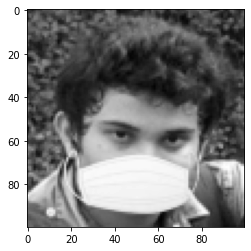

In [ ]:
url = '/content/drive/MyDrive/face_mask/with_mask/with_mask_1725.jpg'
test_image = io.imread(url)

test_image = skimage.color.rgb2gray(test_image)
test_image = resize(test_image, (100, 100), preserve_range=True)
#test_image = skimage.transform.rescale(test_image, 0.5)
#test_image = test_image[80:160,:]
flatten = pd.DataFrame(feature.hog(test_image))
transformed = pca.transform(flatten.T)


plt.imshow(test_image, cmap='gray')


y_pred = ensemble.predict(transformed)
print("No Mask" if y_pred[0] ==0 else "Have Mask")

No Mask


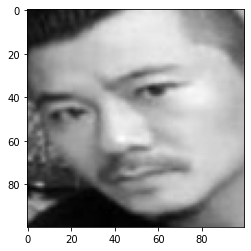

In [ ]:
url = '/content/drive/MyDrive/face_mask/without_mask/without_mask_70.jpg'
test_image = io.imread(url)

test_image = skimage.color.rgb2gray(test_image)
test_image = resize(test_image, (100, 100), preserve_range=True)
#test_image = skimage.transform.rescale(test_image, 0.5)
#test_image = test_image[80:160,:]
flatten = pd.DataFrame(feature.hog(test_image))
transformed = pca.transform(flatten.T)


plt.imshow(test_image, cmap='gray')


y_pred = ensemble.predict(transformed)
print("No Mask" if y_pred[0] ==0 else "Mask")

No Mask


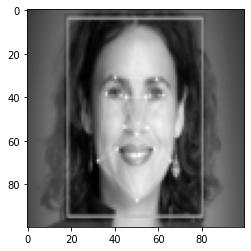

In [ ]:
url = 'https://media.wired.co.uk/photos/606daefe938ecee6e930f071/master/w_1600,c_limit/google-glass-facial-recognition.jpg'
test_image = io.imread(url)

test_image = skimage.color.rgb2gray(test_image)
test_image = resize(test_image, (100, 100), preserve_range=True)
#test_image = skimage.transform.rescale(test_image, 0.5)
#test_image = test_image[80:160,:]
flatten = pd.DataFrame(feature.hog(test_image))
transformed = pca.transform(flatten.T)


plt.imshow(test_image, cmap='gray')


y_pred = ensemble.predict(transformed)
print("No Mask" if y_pred[0] ==0 else "Mask")